Sell analysis

In [18]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
alucar = pd.read_csv('data/alucar.csv')

Verifying dataframe

In [10]:
dataframe_verification = {'lineXcol' :alucar.shape, 'nulldatas' :alucar.isna().sum().sum(), 'datatypes':alucar.dtypes}
dataframe_verification                         

{'lineXcol': (24, 2),
 'nulldatas': 0,
 'datatypes': mes       object
 vendas     int64
 dtype: object}

In [15]:
#convert int64 to datetime
alucar.mes = pd.to_datetime(alucar.mes)

In [40]:
#line plot funcition config
def plot(title, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(14,6)
    ax.set_title(title, loc='Center', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labelx, fontsize=14)
    ax=ax

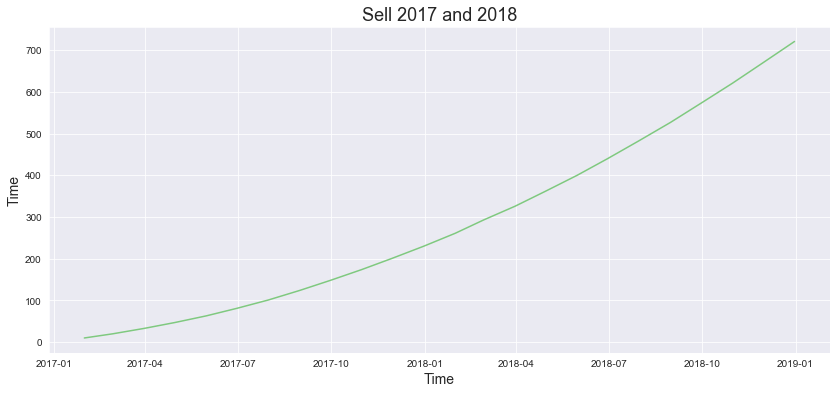

In [41]:
#Graphic Sell by month
plot('Sell 2017 and 2018','Time','Seles"($)"','mes','vendas', alucar)


In [36]:
#Sell growth
alucar['growth']= alucar.vendas.diff()

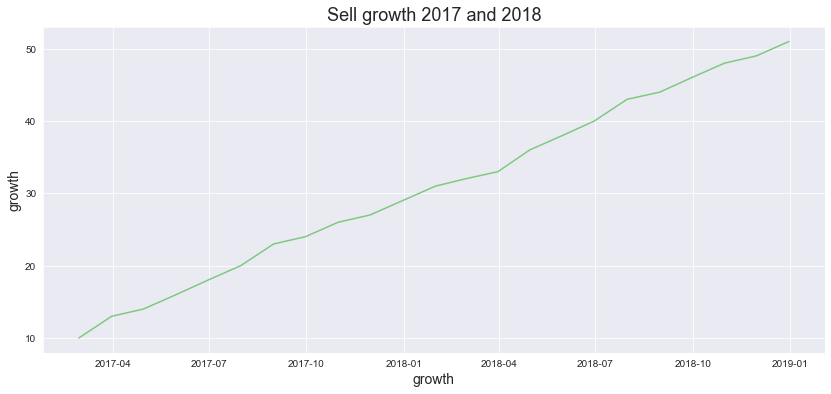

In [42]:
#Graphic groth sell by month
plot('Sell growth 2017 and 2018', 'growth', 'Time','mes','growth', alucar)

In [38]:
#Sell growth rate

In [43]:
alucar['growth_rate']= alucar.growth.diff()

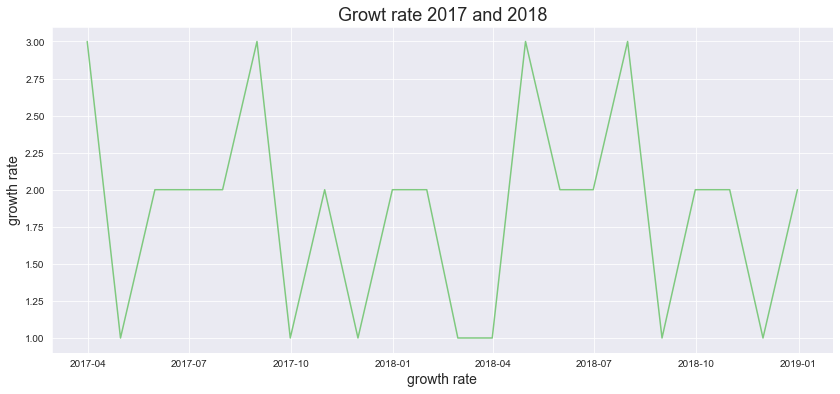

In [44]:
plot('Growt rate 2017 and 2018', 'growth rate','Time', 'mes', 'growth_rate', alucar)

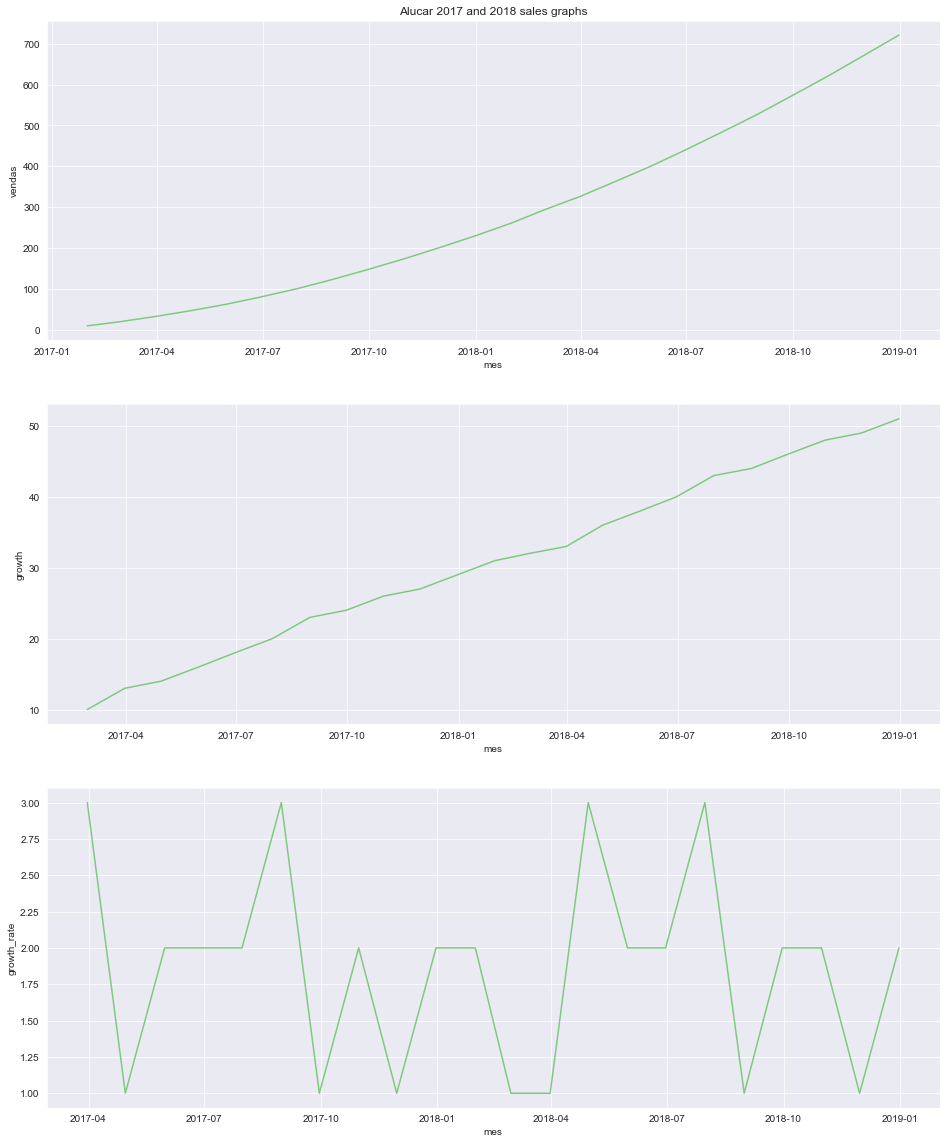

In [50]:
#Gropup the 3 graphs in one figure
plt.figure(figsize=(16,20))
ax = plt.subplot(3,1,1)
ax.set_title('Alucar 2017 and 2018 sales graphs')
sns.lineplot(x='mes',y='vendas',data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes',y='growth',data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes',y='growth_rate',data=alucar)
ax = ax